In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [12]:
import json

In [13]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [14]:
movies['release_date'] = pd.to_datetime(movies['release_date']).apply(lambda x: x.date())

In [15]:
json_columns = ['genres', 'keywords', 'production_countries','production_companies', 'spoken_languages']

In [16]:
for column in json_columns:
        movies[column] = movies[column].apply(json.loads)

In [17]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [18]:
credits = pd.read_csv('tmdb_5000_credits.csv')

In [19]:
json_cols_credits  = ['cast','crew']

In [20]:
for col in json_cols_credits:
    credits[col] = credits[col].apply(json.loads)

In [21]:
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews']

In [22]:
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}

In [23]:
IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}

In [24]:
tmdb_movies = movies.copy()

In [25]:
tmdb_movies.rename(columns = TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES,inplace=True)

In [26]:
tmdb_movies['Title_Year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)

In [27]:
def extract_data_from_json(container,_index):
    result = container
    try:
        for id in _index:
            result = result[id]
        return result
    except IndexError or KeyError:
        return pd.np.nan

In [28]:
tmdb_movies['production_countries'].head(1)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [29]:
tmdb_movies['Country'] = tmdb_movies['production_countries'].apply(lambda x : extract_data_from_json(x,[0,'name']))

In [30]:
tmdb_movies['Language'] = tmdb_movies['spoken_languages'].apply(lambda x: extract_data_from_json(x,[0,'name']))

In [31]:
tmdb_movies['spoken_languages'].head(1)

0    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
Name: spoken_languages, dtype: object

In [32]:
def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return extract_data_from_json(directors,[0])

In [33]:
directors = credits['crew'].apply(get_director)

In [34]:
directors

0            James Cameron
1           Gore Verbinski
2               Sam Mendes
3        Christopher Nolan
4           Andrew Stanton
5                Sam Raimi
6             Byron Howard
7              Joss Whedon
8              David Yates
9              Zack Snyder
10            Bryan Singer
11            Marc Forster
12          Gore Verbinski
13          Gore Verbinski
14             Zack Snyder
15          Andrew Adamson
16             Joss Whedon
17            Rob Marshall
18        Barry Sonnenfeld
19           Peter Jackson
20               Marc Webb
21            Ridley Scott
22           Peter Jackson
23             Chris Weitz
24           Peter Jackson
25           James Cameron
26           Anthony Russo
27              Peter Berg
28         Colin Trevorrow
29              Sam Mendes
               ...        
4773           Kevin Smith
4774         James Bidgood
4775       Andrew Bujalski
4776           Neil LaBute
4777            Eric Eason
4778              Uwe Boll
4

In [35]:
tmdb_movies['Director'] = credits['crew'].apply(get_director)

In [35]:
tmdb_movies['Director']

0            James Cameron
1           Gore Verbinski
2               Sam Mendes
3        Christopher Nolan
4           Andrew Stanton
5                Sam Raimi
6             Byron Howard
7              Joss Whedon
8              David Yates
9              Zack Snyder
10            Bryan Singer
11            Marc Forster
12          Gore Verbinski
13          Gore Verbinski
14             Zack Snyder
15          Andrew Adamson
16             Joss Whedon
17            Rob Marshall
18        Barry Sonnenfeld
19           Peter Jackson
20               Marc Webb
21            Ridley Scott
22           Peter Jackson
23             Chris Weitz
24           Peter Jackson
25           James Cameron
26           Anthony Russo
27              Peter Berg
28         Colin Trevorrow
29              Sam Mendes
               ...        
4773           Kevin Smith
4774         James Bidgood
4775       Andrew Bujalski
4776           Neil LaBute
4777            Eric Eason
4778              Uwe Boll
4

In [36]:
tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: extract_data_from_json(x, [1, 'name']))

In [37]:
tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: extract_data_from_json(x, [2, 'name']))

In [38]:
tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: extract_data_from_json(x, [3, 'name']))

In [39]:
tmdb_movies['genres'].head(1)

0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
Name: genres, dtype: object

In [41]:
def preprocess_genres(keywords):
    return "|".join([x['name'] for x in keywords])

In [42]:
tony1 = tmdb_movies['plot_keywords'].apply(preprocess_genres)

In [48]:
tony

0       culture clash|future|space war|space colony|so...
1       ocean|drug abuse|exotic island|east india trad...
2       spy|based on novel|secret agent|sequel|mi6|bri...
3       dc comics|crime fighter|terrorist|secret ident...
4       based on novel|mars|medallion|space travel|pri...
5       dual identity|amnesia|sandstorm|love of one's ...
6       hostage|magic|horse|fairy tale|musical|princes...
7       marvel comic|sequel|superhero|based on comic b...
8       witch|magic|broom|school of witchcraft|wizardr...
9       dc comics|vigilante|superhero|based on comic b...
10      saving the world|dc comics|invulnerability|seq...
11      killing|undercover|secret agent|british secret...
12      witch|fortune teller|bondage|exotic island|mon...
13      texas|horse|survivor|texas ranger|partner|outl...
14      saving the world|dc comics|superhero|based on ...
15      based on novel|fictional place|brother sister ...
16      new york|shield|marvel comic|superhero|based o...
17      sea|ca

In [51]:
tony1

0       culture clash|future|space war|space colony|so...
1       ocean|drug abuse|exotic island|east india trad...
2       spy|based on novel|secret agent|sequel|mi6|bri...
3       dc comics|crime fighter|terrorist|secret ident...
4       based on novel|mars|medallion|space travel|pri...
5       dual identity|amnesia|sandstorm|love of one's ...
6       hostage|magic|horse|fairy tale|musical|princes...
7       marvel comic|sequel|superhero|based on comic b...
8       witch|magic|broom|school of witchcraft|wizardr...
9       dc comics|vigilante|superhero|based on comic b...
10      saving the world|dc comics|invulnerability|seq...
11      killing|undercover|secret agent|british secret...
12      witch|fortune teller|bondage|exotic island|mon...
13      texas|horse|survivor|texas ranger|partner|outl...
14      saving the world|dc comics|superhero|based on ...
15      based on novel|fictional place|brother sister ...
16      new york|shield|marvel comic|superhero|based o...
17      sea|ca

In [45]:
tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(preprocess_genres)
#tmdb_movies['genres'] = tmdb_movies['genres'].apply(preprocess_genres)

In [46]:
tmdb_movies['plot_keywords']

0       culture clash|future|space war|space colony|so...
1       ocean|drug abuse|exotic island|east india trad...
2       spy|based on novel|secret agent|sequel|mi6|bri...
3       dc comics|crime fighter|terrorist|secret ident...
4       based on novel|mars|medallion|space travel|pri...
5       dual identity|amnesia|sandstorm|love of one's ...
6       hostage|magic|horse|fairy tale|musical|princes...
7       marvel comic|sequel|superhero|based on comic b...
8       witch|magic|broom|school of witchcraft|wizardr...
9       dc comics|vigilante|superhero|based on comic b...
10      saving the world|dc comics|invulnerability|seq...
11      killing|undercover|secret agent|british secret...
12      witch|fortune teller|bondage|exotic island|mon...
13      texas|horse|survivor|texas ranger|partner|outl...
14      saving the world|dc comics|superhero|based on ...
15      based on novel|fictional place|brother sister ...
16      new york|shield|marvel comic|superhero|based o...
17      sea|ca

In [47]:
metadata = pd.read_csv('movies_metadata.csv')

c:\users\tony\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
metadata.shape

(45466, 24)

In [48]:
import math,nltk,warnings

In [49]:
from nltk.corpus import wordnet

In [50]:
from sklearn import linear_model

In [51]:
from sklearn.neighbors import NearestNeighbors

In [61]:
from fuzzywuzzy import fuzz

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [62]:
from wordcloud import WordCloud, STOPWORDS

In [63]:
warnings.filterwarnings('ignore')

In [64]:
porterstemmer = nltk.stem.PorterStemmer()

In [69]:
Cleaned_Movies_data = tmdb_movies.copy()

In [70]:
Cleaned_Movies_data

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,movie_title,vote_average,num_voted_users,Title_Year,Country,Language,Director,actor_1_name,actor_2_name,actor_3_name
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Avatar,7.2,11800,2009.0,United States of America,English,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Spectre,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,The Dark Knight Rises,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,John Carter,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Spider-Man 3,5.9,3576,2007.0,United States of America,English,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|musical|princes...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Tangled,7.4,3330,2010.0,United States of America,English,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,Avengers: Age of Ultron,7.3,6767,2015.0,United States of America,English,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,Harry Potter and the Half-Blood Prince,7.4,5293,2009.0,United Kingdom,English,David Yates,Rupert Grint,Emma Watson,Tom Felton
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,en,Batman v Superman: Dawn of Justice,Fearing the 

In [73]:
movies_info = pd.DataFrame(Cleaned_Movies_data.dtypes).T

In [74]:
movies_info

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,movie_title,vote_average,num_voted_users,Title_Year,Country,Language,Director,actor_1_name,actor_2_name,actor_3_name
0,int64,object,object,int64,object,object,object,object,float64,object,...,object,float64,int64,float64,object,object,object,object,object,object


In [75]:
movies_info = movies_info.rename(index ={0 :'Colomn Type'})

In [76]:
movies_info

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,movie_title,vote_average,num_voted_users,Title_Year,Country,Language,Director,actor_1_name,actor_2_name,actor_3_name
Colomn Type,int64,object,object,int64,object,object,object,object,float64,object,...,object,float64,int64,float64,object,object,object,object,object,object


In [77]:
movies_info = movies_info.append(pd.DataFrame(Cleaned_Movies_data.isnull().sum()).T.rename(index = {0:'Null Values Count'}))

In [78]:
movies_info = movies_info.append(pd.DataFrame(Cleaned_Movies_data.isnull().sum()/Cleaned_Movies_data.shape[0] *100).T.rename(index = {0:'Null Values (%)'}))

In [79]:
movies_info

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,movie_title,vote_average,num_voted_users,Title_Year,Country,Language,Director,actor_1_name,actor_2_name,actor_3_name
Colomn Type,int64,object,object,int64,object,object,object,object,float64,object,...,object,float64,int64,float64,object,object,object,object,object,object
Null Values Count,0,0,3091,0,0,0,0,3,0,0,...,0,0,0,1,174,86,30,53,63,93
Null Values (%),0,0,64.3556,0,0,0,0,0.062461,0,0,...,0,0,0,0.0208203,3.62274,1.79055,0.62461,1.10348,1.31168,1.93629


In [80]:
set_keywords = set()

In [81]:
Cleaned_Movies_data['plot_keywords']

0       culture clash|future|space war|space colony|so...
1       ocean|drug abuse|exotic island|east india trad...
2       spy|based on novel|secret agent|sequel|mi6|bri...
3       dc comics|crime fighter|terrorist|secret ident...
4       based on novel|mars|medallion|space travel|pri...
5       dual identity|amnesia|sandstorm|love of one's ...
6       hostage|magic|horse|fairy tale|musical|princes...
7       marvel comic|sequel|superhero|based on comic b...
8       witch|magic|broom|school of witchcraft|wizardr...
9       dc comics|vigilante|superhero|based on comic b...
10      saving the world|dc comics|invulnerability|seq...
11      killing|undercover|secret agent|british secret...
12      witch|fortune teller|bondage|exotic island|mon...
13      texas|horse|survivor|texas ranger|partner|outl...
14      saving the world|dc comics|superhero|based on ...
15      based on novel|fictional place|brother sister ...
16      new york|shield|marvel comic|superhero|based o...
17      sea|ca

In [82]:
for listed_keywords in Cleaned_Movies_data['plot_keywords'].str.split('|').values:
    if isinstance(listed_keywords,float):
        continue
    set_keywords = set_keywords.union(listed_keywords)

In [84]:
set_keywords.remove('')

In [85]:
set_keywords

{'deaf-mute',
 'villain',
 'pirate radio',
 'domestic abuse',
 'contamination',
 'vineyard',
 'roman catholic',
 'dublin',
 'transhumanism',
 'blizzard',
 'snow',
 'doorman',
 'forty something',
 'bridge',
 'corporate',
 'economic theory',
 'hidden truth',
 'ex-boyfriend ex-girlfriend relationship',
 'grieving widower',
 'polaroid',
 'vomiting',
 'space war',
 'jet',
 'animated sequence',
 'murder plot',
 'soccer',
 'sphinx',
 'back to school',
 'resort hotel',
 'flight',
 'rookie cop',
 'convent',
 'hollywood',
 'trans-siberian railway',
 'arsonist',
 'investor',
 'alienation',
 'berater',
 'broken arm',
 'teenage love',
 'docudrama',
 'one-sided love',
 'loneliness',
 'trailer',
 'bathroom humor',
 'settler',
 'locker',
 'testicles',
 'mentor protégé relationship',
 'hijack',
 'unity',
 'gang warfare',
 'concierge',
 'near miss',
 'black panther',
 'belching',
 'what if',
 'exploding train',
 'drill instructor',
 'suburbia',
 'mining',
 'coworker relationship',
 'english subtitles in

In [94]:
key_count = dict()

In [112]:
for s in set_keywords:
    key_count[s]=0

key_count
for lists in Cleaned_Movies_data['plot_keywords'].str.split('|'):
    if type(lists) == float and pd.isnull(liste_keywords): continue
    for s in [s for s in lists if s in set_keywords]:
        if pd.notnull(s): key_count[s] += 1
key_occurences =[]
for k,v in key_count.items():
    key_occurences.append([k,v])
#print(key_occurences)
key_occurences.sort(key=lambda x:x[1],reverse=True)

In [113]:
key_occurences[:5]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 189]]

In [92]:
def count_words(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [93]:
keyword_occurences, dum = count_words(Cleaned_Movies_data, 'plot_keywords', set_keywords)
keyword_occurences[:5]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 189]]

In [114]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

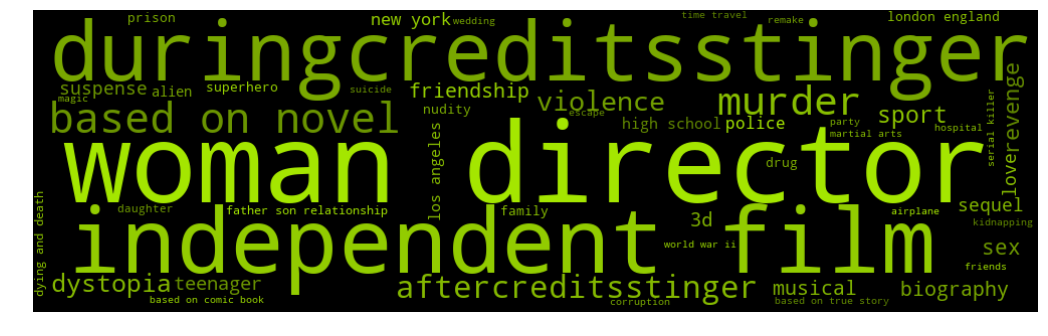

In [120]:
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0
wordcloud = WordCloud(width=1000,height=300,background_color='black',max_words=1628,relative_scaling=1,color_func=random_color_func,normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud,interpolation='bilinear')
ax1.axis('off')
plt.show()


In [131]:
missing_data_per_col = Cleaned_Movies_data.isnull().sum(axis =0).reset_index()
missing_data_per_col.columns = ['Column Name','Missing_count']

In [135]:
missing_data_per_col['Filling_Factor'] = (Cleaned_Movies_data.shape[0]-missing_data_per_col['Missing_count'])/Cleaned_Movies_data.shape[0] *100

In [138]:
missing_data_per_col.sort_values('Filling_Factor').reset_index(drop =True)

,Column Name,Missing_count,Filling_Factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,Country,174,96.377264
3,actor_3_name,93,98.063710
4,Language,86,98.209452
5,actor_2_name,63,98.688320
6,actor_1_name,53,98.896523
7,Director,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359


In [145]:
Cleaned_Movies_data['Decade'] = Cleaned_Movies_data['Title_Year'].apply(lambda x : ((x-1900)//10)*10)

In [146]:
Cleaned_Movies_data['Decade']

0       100.0
1       100.0
2       110.0
3       110.0
4       110.0
5       100.0
6       110.0
7       110.0
8       100.0
9       110.0
10      100.0
11      100.0
12      100.0
13      110.0
14      110.0
15      100.0
16      110.0
17      110.0
18      110.0
19      110.0
20      110.0
21      110.0
22      110.0
23      100.0
24      100.0
25       90.0
26      110.0
27      110.0
28      110.0
29      110.0
        ...  
4773     90.0
4774     70.0
4775    100.0
4776     90.0
4777    100.0
4778    100.0
4779     90.0
4780    110.0
4781    110.0
4782    100.0
4783    110.0
4784    100.0
4785    110.0
4786    100.0
4787    110.0
4788     70.0
4789    100.0
4790    100.0
4791    100.0
4792     90.0
4793    100.0
4794    110.0
4795     90.0
4796    100.0
4797    100.0
4798     90.0
4799    110.0
4800    110.0
4801    110.0
4802    100.0
Name: Decade, Length: 4803, dtype: float64

In [150]:
def stats_of_data(data):
    return{'min':data.min(),'max':data.max(),'count':data.count(),'mean':data.mean()}

In [151]:
test = Cleaned_Movies_data['Title_Year'].groupby(Cleaned_Movies_data['Decade']).apply(stats_of_data)

In [152]:
test

Decade       
10.0    count       1.000000
        max      1916.000000
        mean     1916.000000
        min      1916.000000
20.0    count       4.000000
        max      1929.000000
        mean     1927.500000
        min      1925.000000
30.0    count      15.000000
        max      1939.000000
        mean     1935.733333
        min      1930.000000
40.0    count      25.000000
        max      1949.000000
        mean     1944.560000
        min      1940.000000
50.0    count      27.000000
        max      1959.000000
        mean     1954.296296
        min      1950.000000
60.0    count      71.000000
        max      1969.000000
        mean     1965.028169
        min      1960.000000
70.0    count     109.000000
        max      1979.000000
        mean     1974.944954
        min      1970.000000
80.0    count     278.000000
        max      1989.000000
        mean     1984.715827
        min      1980.000000
90.0    count     778.000000
        max      1999.000000


In [153]:
test_unstack = test.unstack()

In [154]:
test_unstack

,count,max,mean,min
Decade,,,,
10.0,1.0,1916.0,1916.000000,1916.0
20.0,4.0,1929.0,1927.500000,1925.0
30.0,15.0,1939.0,1935.733333,1930.0
40.0,25.0,1949.0,1944.560000,1940.0
50.0,27.0,1959.0,1954.296296,1950.0
60.0,71.0,1969.0,1965.028169,1960.0
70.0,109.0,1979.0,1974.944954,1970.0
80.0,278.0,1989.0,1984.715827,1980.0
90.0,778.0,1999.0,1996.141388,1990.0


In [155]:
genre_labels = set()

In [158]:
for s in Cleaned_Movies_data['genres'].str.split('|').values:
    genre_labels= genre_labels.union(set(s))

In [157]:
genre_labels

{'',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [159]:
genre_labels

{'',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [160]:
genre_labels.remove('')

In [161]:
genre_labels

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [162]:
genre_labels_keywords,dummy = count_words(Cleaned_Movies_data,'genres',genre_labels)

In [163]:
genre_labels_keywords

[['Drama', 2297],
 ['Comedy', 1722],
 ['Thriller', 1274],
 ['Action', 1154],
 ['Romance', 894],
 ['Adventure', 790],
 ['Crime', 696],
 ['Science Fiction', 535],
 ['Horror', 519],
 ['Family', 513],
 ['Fantasy', 424],
 ['Mystery', 348],
 ['Animation', 234],
 ['History', 197],
 ['Music', 185],
 ['War', 144],
 ['Documentary', 110],
 ['Western', 82],
 ['Foreign', 34],
 ['TV Movie', 8]]

In [164]:
genre_words = dict()

In [165]:
genre_truncate_occurences = genre_labels_keywords[:50]

In [166]:
for s in genre_truncate_occurences:
    genre_words[s[0]] = s[1]


In [167]:
tone =100

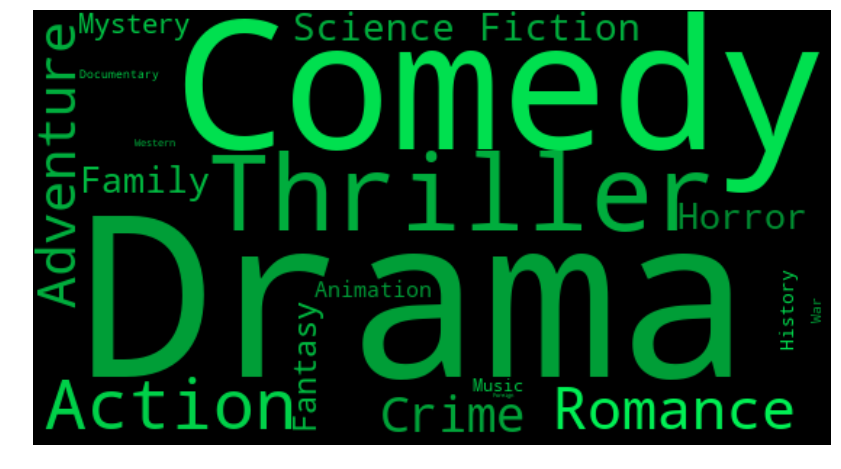

In [168]:
fig,ax = plt.subplots(figsize =(16,8))
word_cloud = WordCloud(width=550,height=300,background_color='black',max_words=1628,relative_scaling=0.7,color_func=random_color_func,normalize_plurals=False)
word_cloud.generate_from_frequencies(genre_words)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [184]:
len(set_keywords)
import nltk
stemmer = nltk.stem.PorterStemmer()

In [173]:
def keywords_in_plot_variable(Cleaned_Movies_data,column = 'plot_keywords'):
    stemmer = nltk.stem.PorterStemmer()
    keywords_root = dict()
    keywords_select = dict()
    category_keys = []
    icount =0
    for s in Cleaned_Movies_data[column]:
        if pd.isnull(s): continue
        for t in s.split('|'):
            t = t.lower();
            stemmed_word = stemmer.stem(t)
            if stemmed_word in keywords_root:
                keywords_root[stemmed_word].add(t)
            else:
                keywords_root[stemmed_word] ={t}
    for s in keywords_root.keys():
        if len(keywords_root[s])>1:
            min_length =1000
            for k in keywords_root[s]:
                if len(k) < min_length:
                    clef =k;
                    min_length = len(k)
            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_root[s])[0])
            keywords_select[s] = list(keywords_root[s])[0]
            
            
    print("Nb of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys,keywords_root,keywords_select

In [174]:
keywords,keywords_root,keywords_select = keywords_in_plot_variable(Cleaned_Movies_data)

Nb of keywords in variable 'plot_keywords': 9474


In [217]:
len(keywords_select)

9684

In [218]:
stemmer = nltk.stem.PorterStemmer()

In [219]:
Keywords_Root = dict()
Keywords_Select = dict()
Category_Keys = []

In [221]:
for list_keywords in Cleaned_Movies_data['plot_keywords']:
    if pd.isnull(list_keywords):
        continue
    for keyword in list_keywords.split('|'):
        keyword = keyword.lower()
        stemmed_keyword = stemmer.stem(keyword)
        if stemmed_keyword in Keywords_Root:
            Keywords_Root[stemmed_keyword].add(keyword)
        else:
            Keywords_Root[stemmed_keyword] = {keyword}


In [223]:
len(Keywords_Root)

9474

In [ ]:
for key in Keywords_Root.keys():
    if(len(Keywords_Root[key])>1):
        min_length =1000
        for keyword in Keywords_Root[key]:
            
            